### Student Name : Budhil Chakma
### Student ID : 47554266

## Introduction:

In today's data-centric business environment, extracting meaningful insights from complex datasets is not just beneficial but essential. From predicting future revenue streams to understanding customer segments and behaviors, analytical techniques offer a lens through which we can better understand and optimize business operations. This notebook dives deep into the supermarket sales dataset, applying a gamut of techniques from linear regression to clustering and classification.


## Purposes:

### Revenue Prediction:

Deploy linear regression techniques to forecast 'revenue' using various dataset features. This extends from a simple linear regression model to exploring polynomial regression for capturing potential non-linear relationships.
### Feature Importance Analysis:

Harness the power of Recursive Feature Elimination (RFE) to systematically determine the most influential features within the dataset. This aids in understanding which variables play a pivotal role in driving revenue predictions.
### Sales Trend and Customer Behavior Analysis:

Undertake clustering, specifically using the k-means algorithm, to dissect the supermarket's sales data. This seeks to unveil latent sales trends and segmentations, offering insights into customer purchasing patterns.
### Optimization of Clustering Parameters:

Before diving into clustering, refine the process by ascertaining the optimal number of clusters using the Elbow Method, ensuring the k-means algorithm's results are both meaningful and interpretable.
### Customer Type Classification:

Apply the K-Nearest Neighbors (KNN) algorithm to categorize customers into 'Member' and 'Normal' groups. This classification aims to shed light on the unique characteristics and purchasing behaviors of distinct customer categories.
### Model Assessment and Strategy Refinement:

Critically evaluate the performance of the various analytical techniques applied, from linear regression to k-means clustering and KNN. This encompasses gauging the efficacy of each method, juxtaposing their outcomes, and drawing actionable insights to inform and refine future data-driven strategies.

## Exploring the Data

In [5]:
import pandas as pd

In [11]:
data = pd.read_csv('supermarket_sales.csv')

In [12]:
data.head()

,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,5pct_markup,revenue,date,time,payment_method,cogs,gm_pct,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   invoice_id       1000 non-null   object        
 1   branch           1000 non-null   object        
 2   city             1000 non-null   object        
 3   customer_type    1000 non-null   object        
 4   gender_customer  1000 non-null   object        
 5   product_line     1000 non-null   object        
 6   unit_cost        1000 non-null   float64       
 7   quantity         1000 non-null   int64         
 8   5pct_markup      1000 non-null   float64       
 9   revenue          1000 non-null   float64       
 10  date             1000 non-null   datetime64[ns]
 11  time             1000 non-null   object        
 12  payment_method   1000 non-null   object        
 13  cogs             1000 non-null   float64       
 14  gm_pct           1000 non-null   float64 

In [14]:
data.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender_customer',
       'product_line', 'unit_cost', 'quantity', '5pct_markup', 'revenue',
       'date', 'time', 'payment_method', 'cogs', 'gm_pct', 'gross_income',
       'rating'],
      dtype='object')

In [69]:
data.shape[0]

1000

In [70]:
data.shape[1]

18

## Predictive Modeling with Linear Regression

### Linear Regression
Choosing Target Variable and Features:
My target variable will be "revenue". For features, I will initially consider numerical columns and encode necessary categorical columns.

In [16]:
# Spliting the data 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

# Features and target variable
X = data.drop(columns=['revenue', 'invoice_id', 'date', 'time'])  # Dropping non-numeric and target columns
y = data['revenue']

# Encoding categorical columns
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print(X_train.shape) 
print(X_test.shape)


(800, 13)
(200, 13)


In [20]:
# Training the linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initializing and training the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr_model.predict(X_test)

# Calculating the evaluation metrics for the linear regression model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE :",mse) 
print("MAE: ",mae) 
print("r2: ", r2)


MSE : 5022.154298524566
MAE:  56.910096551980644
r2:  0.922806163495213


Here are the evaluation metrics for the baseline Linear Regression model predicting revenue:

Mean Squared Error (MSE): 
5022.15 <br>
Mean Absolute Error (MAE): 
56.91 <br>
R 2(Coefficient of Determination): 
0.923 <br>
The R2 value of 0.923 indicates that approximately 92.3% of the variability in revenue can be explained by the model, which is a good start.

### Polynomial Regression
Feature Transformation : <br>
Next, I will enhance the model by transforming the features into polynomial features and training a polynomial regression model. I will start with a degree of 2 for the polynomial features.

In [21]:
from sklearn.preprocessing import PolynomialFeatures

# Transforming features into polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Training the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predicting on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Calculating the evaluation metrics for the polynomial regression model
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("MSE poly :",mse_poly) 
print("MAE poly: ",mae_poly) 
print("r2 poly: ", r2_poly)


MSE poly : 11.67778848050737
MAE poly:  2.554283684828283
r2 poly:  0.99982050465973


Here are the evaluation metrics for the Polynomial Regression model (with a degree of 2) predicting revenue:

Mean Squared Error (MSE): 
11.68 <br>
Mean Absolute Error (MAE): 
2.54 <br>
R 2(Coefficient of Determination): 
0.9998 <br>
The Polynomial Regression model has significantly improved the performance with an R 2 value of 0.9998, indicating that approximately 99.98% of the variability in revenue can be explained by the model. The errors (MSE and MAE) are also considerably lower than the baseline Linear Regression model.

## Feature Selection with RFE
Now I will use Recursive Feature Elimination (RFE) to determine the importance of features in predicting revenue with the linear regression model. This will help identifyng  which features are most influential in predicting revenue.

In [22]:
from sklearn.feature_selection import RFE

# Using RFE to rank features
selector = RFE(lr_model, n_features_to_select=1)
selector = selector.fit(X_train, y_train)

# Extracting the feature rankings
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': selector.ranking_
}).sort_values(by='Ranking')

feature_ranking


,Feature,Ranking
0,branch,1
8,payment_method,2
1,city,3
2,customer_type,4
9,cogs,5
4,product_line,6
11,gross_income,7
12,rating,8
7,5pct_markup,9
6,quantity,10


'branch' is ranked as the most influential feature in predicting revenue, followed by 'payment_method' and 'city'. Features like 'gm_pct', 'cogs', and 'unit_cost' are considered less influential in the linear regression model.

## Clustering Analysis on Supermarket Sales Data

 The objective is to understand the sales trend over time and identify which product lines generate the most revenue. I will also incorporate clustering techniques, such as k-means, to identify patterns or segments within the sales data.

### Sales Trend Over Time
To start, I'll visualize the sales trend over time. This will give an overview of how sales have evolved.

C:\Users\Budhil\AppData\Local\Temp\ipykernel_1588\334206538.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_sales = data.groupby('date').sum()['revenue']


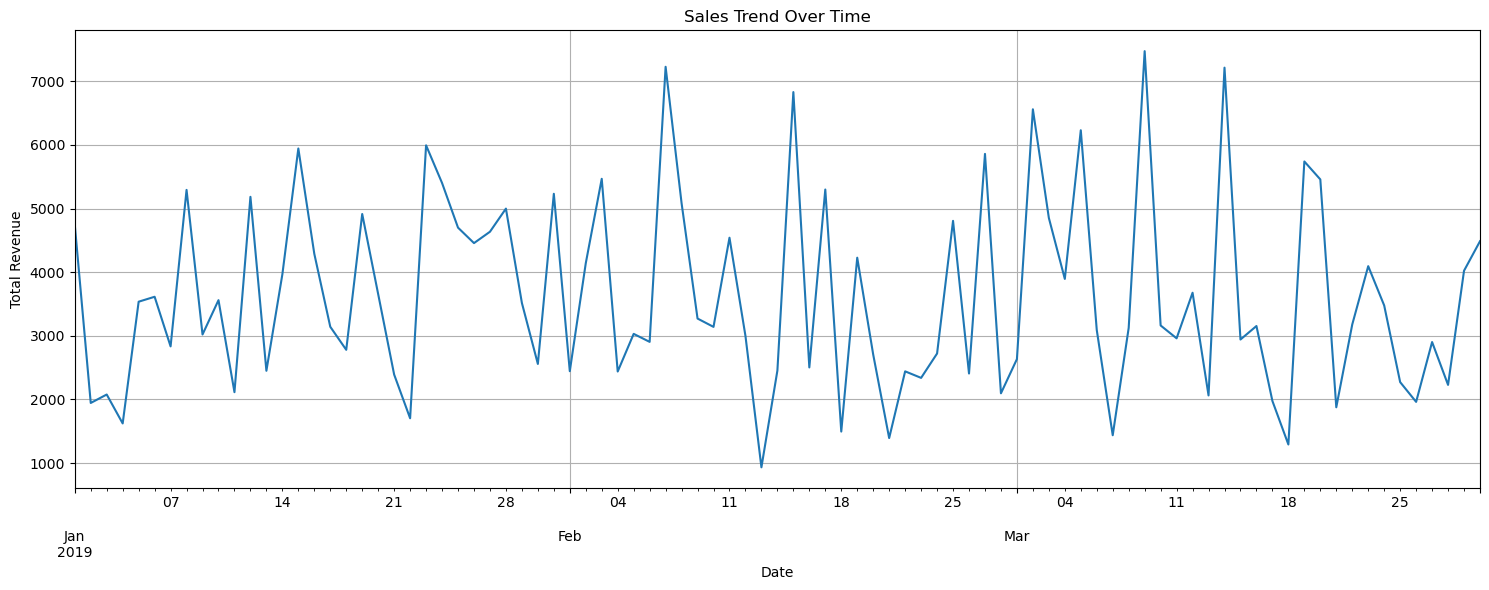

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'date' column to datetime format for easy plotting
data['date'] = pd.to_datetime(data['date'])

# Group by date and sum the revenue for each day
daily_sales = data.groupby('date').sum()['revenue']

# Plotting
plt.figure(figsize=(15, 6))
daily_sales.plot()
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


Revenue by Product Line
Next, let's explore which product lines generate the most revenue. I'll visualize the total revenue for each product line.

C:\Users\Budhil\AppData\Local\Temp\ipykernel_1588\863530339.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_sales = data.groupby('product_line').sum()['revenue']


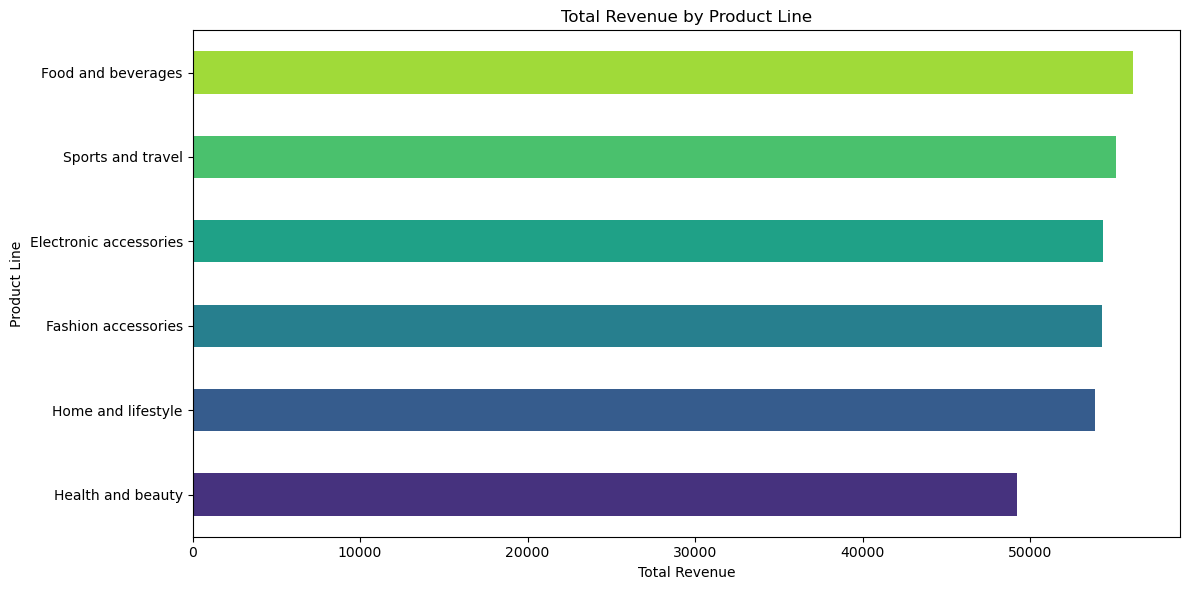

The bar chart shows that the "Fashion accessories" and "Food and beverages" product lines have generated the highest revenue, followed closely by "Electronic accessories" and "Sports and travel". The "Home and lifestyle" and "Health and beauty" categories have relatively lower revenue in comparison.

### Clustering using K-means
Now, let's attempt to cluster the data to see if we can identify any patterns or segments within the sales data. I'll use the k-means clustering algorithm. For this analysis, I'll focus on two features: quantity and revenue to understand customer buying behaviors.

Before clustering, I need to determine the optimal number of clusters. I'll use the Elbow Method to identify this.

C:\Users\Budhil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Budhil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Budhil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Budhil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

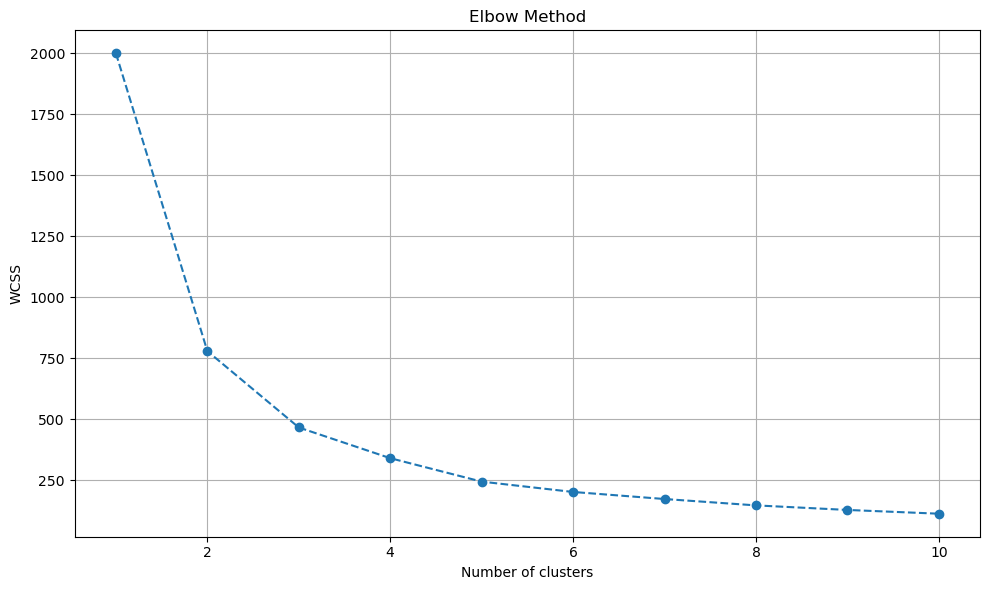

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extracting quantity and revenue columns for clustering
cluster_data = data[['quantity', 'revenue']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Determine the optimal number of clusters using Elbow Method
wcss = []  # Within-cluster sum of squares
cluster_range = range(1, 11)
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.tight_layout()
plt.show()

The Elbow Method graph helps determine the optimal number of clusters for k-means clustering. It can be seen that the decrease in WCSS (Within-cluster sum of squares) starts to slow down around 2 or 3 clusters. Hence, we could choose either 2 or 3 as the optimal number of clusters.I am going with 2 as there is only two types of customer.

C:\Users\Budhil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Budhil\AppData\Local\Temp\ipykernel_1588\1057577121.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='quantity', y='revenue', palette='viridis',style='customer_type', s=100, alpha=0.7)


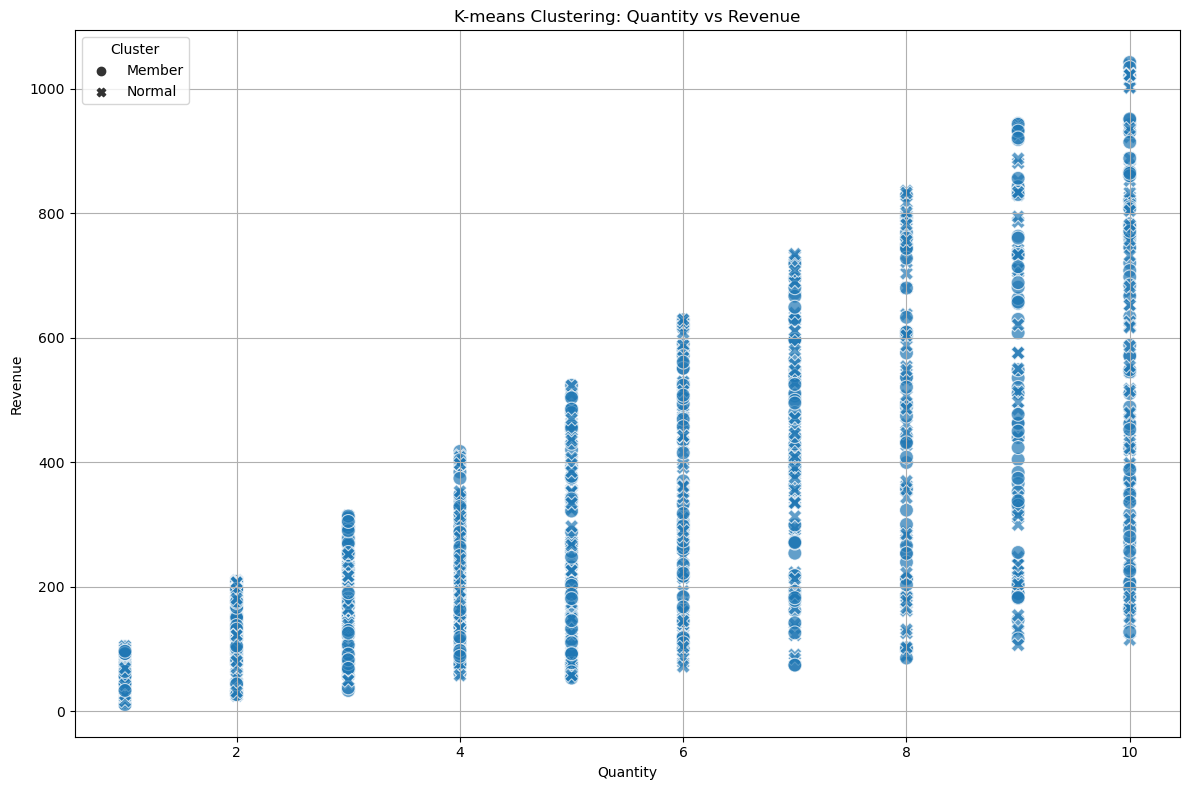

In [67]:
# Applying k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='quantity', y='revenue', palette='viridis',style='customer_type', s=100, alpha=0.7)
plt.title('K-means Clustering: Quantity vs Revenue')
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


### Analysis 
It can be seen that there are significant number of overlapping in the clustering meaning the K-means algorithm was not able to separate the data entirely. The plot did manage give useful insight on the buying quantity of the members and non-members. A significant amount of clustering can be seen in the range of 8-10 indicating most of the customers tend to buy product in large qauntity which ultimately influences the revenue of the supermarket.

### Conlusion
The insight gained from the K-means clustering can be helpful torwards understanding the buying pattern of the customers. And as supermarket revenue rely on very marginal profit, purchases in large quantity boost the revenue of a supermarket a lot. So this data can help them to plan certain marketing stratigies which will influence customers to buy product in large quantities.  


## Classifying the customer_type using KNN classification.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the target and features
y_classification = data['customer_type']
X_classification = data.drop('customer_type', axis=1)

# Removing non-feature columns
X_classification = X_classification.drop(['invoice_id', 'date', 'time'], axis=1)

# Create column transformer for preprocessing
preprocessor_classification = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['unit_cost', 'quantity', '5pct_markup', 'revenue', 'cogs', 'gm_pct', 'gross_income', 'rating']),
        ('cat', OneHotEncoder(drop='first'), ['branch', 'payment_method', 'city', 'gender_customer', 'product_line'])
    ])

# Split the data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Apply transformations to our data
X_train_transformed_class = preprocessor_classification.fit_transform(X_train_class)
X_test_transformed_class = preprocessor_classification.transform(X_test_class)

X_train_transformed_class[:5]  # Display the first 5 rows of transformed training data


array([[-1.16030757,  1.18465655, -0.34546165, -0.34546165, -0.34546165,
         0.        , -0.34546165,  0.2379952 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [-1.4733009 ,  0.5074681 , -0.8087363 , -0.8087363 , -0.8087363 ,
         0.        , -0.8087363 ,  0.2379952 ,  0.        ,  1.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 1.21874632, -0.16972036,  0.57331749,  0.57331749,  0.57331749,
         0.        ,  0.57331749, -0.23024006,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 1.6433054 ,  1.52325078,  2.94041269,  2.94041269,  2.94041269,
         0.        ,  2.94041269, -1.45935762,  

The features have been selected and transformed.
Categorical features have been converted into numerical format using one-hot encoding.
The feature data has been normalized.
The data has been split into training and testing sets.
<br>
Next, I'll determine the optimal value for k (number of neighbors) using cross-validation. After finding the best k, I'll use the Weighted KNN approach and train the KNN classifier on the training data and evaluate its performance on the test data.

In [57]:
# Define the KNN classifier with weights
knn_weighted_classifier = KNeighborsClassifier(weights='distance')  # Weights set to 'distance'

# Grid search for hyperparameter tuning with weighted KNN
param_grid_weighted = {
    'n_neighbors': list(range(1, 31)),
    'p': [1, 2, 3]  # 1 for Manhattan, 2 for Euclidean, 3 for Chebyshev
}

grid_search_weighted = GridSearchCV(knn_weighted_classifier, param_grid_weighted, cv=5, scoring='accuracy', return_train_score=True)
grid_search_weighted.fit(X_train_transformed_class, y_train_class)

# Train the KNN classifier with the best parameters
best_knn_weighted = grid_search_weighted.best_estimator_
best_knn_weighted.fit(X_train_transformed_class, y_train_class)

# Predict on the test data
y_pred_weighted = best_knn_weighted.predict(X_test_transformed_class)

# Calculate classification metrics to evaluate performance
accuracy_weighted = accuracy_score(y_test_class, y_pred_weighted)
classification_rep_weighted = classification_report(y_test_class, y_pred_weighted)

best_params_weighted = grid_search_weighted.best_params_

best_params_weighted, accuracy_weighted, classification_rep_weighted


({'n_neighbors': 4, 'p': 3},
 0.49,
 '              precision    recall  f1-score   support\n\n      Member       0.47      0.45      0.46        97\n      Normal       0.50      0.52      0.51       103\n\n    accuracy                           0.49       200\n   macro avg       0.49      0.49      0.49       200\nweighted avg       0.49      0.49      0.49       200\n')

In [59]:
from sklearn.metrics import roc_auc_score

# Get the probability of being a "Member"
y_prob_member = best_knn_weighted.predict_proba(X_test_transformed_class)[:, 1]

# Calculate AUC-ROC for the "Member" class
auc_roc = roc_auc_score(y_test_class, y_prob_member)

accuracy_weighted, auc_roc, classification_rep_weighted


(0.49,
 0.5220198178360524,
 '              precision    recall  f1-score   support\n\n      Member       0.47      0.45      0.46        97\n      Normal       0.50      0.52      0.51       103\n\n    accuracy                           0.49       200\n   macro avg       0.49      0.49      0.49       200\nweighted avg       0.49      0.49      0.49       200\n')

Here are the evaluation metrics for the weighted KNN classification model:

### Accuracy: 49%

### AUC-ROC: 0.5220

### Classification Report:
#### Member:
Precision: 0.47
 <br>
Recall: 0.45
<br>
F1-score: 0.46
#### Normal:
Precision: 0.50
<br>
Recall: 0.52
<br> 
F1-score: 0.51
<br>
The AUC-ROC score is slightly above 0.5, indicating that the model has a slight ability to distinguish between the two classes, but it's close to a random guess.

### Results:
#### Optimal Hyperparameters:

Number of Neighbors (k): The best number of neighbors determined by cross-validation is 4. This means that when classifying a new data point, the algorithm considers the 4 nearest data points and uses their weighted labels to make a decision.
Distance Metric (p): The Chebyshev distance (with p=3) was found to be the best distance metric. Chebyshev distance is the maximum absolute difference between coordinates of pairs of points. In a two-dimensional plane, it corresponds to the "chessboard" or "king's move" distance.
#### Evaluation Metrics:

Accuracy: The weighted KNN classifier has an accuracy of 49% on the test data. This means that the model correctly predicted the customer type in almost half of the test cases. Given that the problem is binary classification, this accuracy is only slightly below random guessing (50%).

#### Classification Report:

Member: The precision is 0.47, meaning that out of all instances predicted as 'Member', 47% were correctly classified. The recall is 0.45, indicating that the model identified 45% of all actual 'Member' instances.<BR>
Normal: The precision is 0.50, which means that out of all instances predicted as 'Normal', 50% were correctly classified. The recall is 0.52, showing that the model captured 52% of all actual 'Normal' instances.

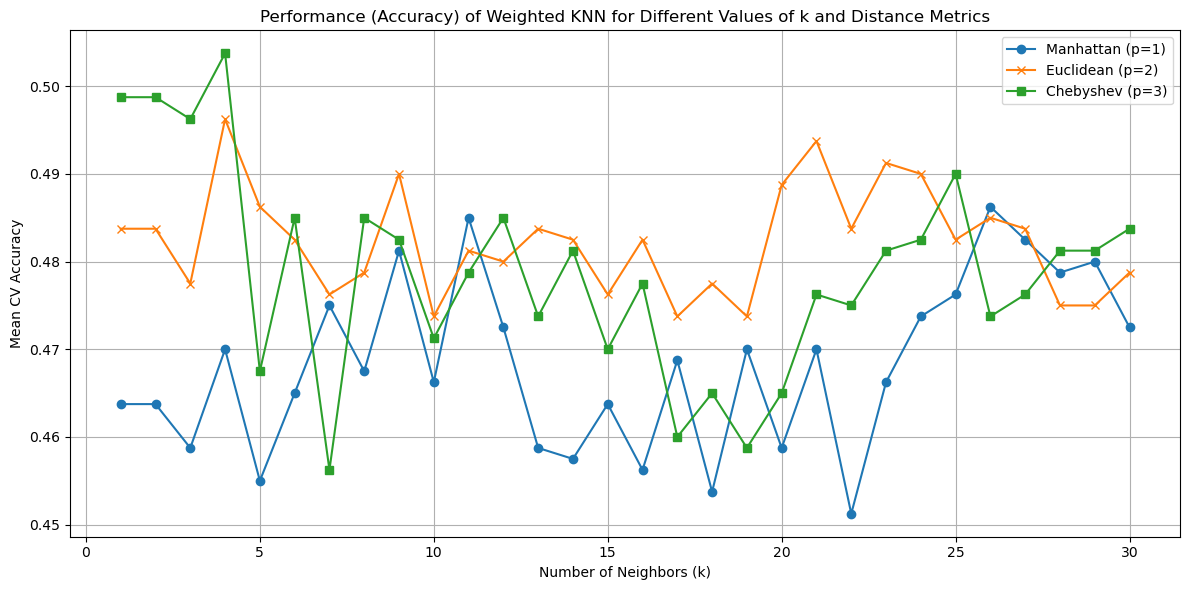

In [58]:
import matplotlib.pyplot as plt

# Extracting mean test scores from the grid search results for each distance metric
scores_manhattan = grid_search_weighted.cv_results_['mean_test_score'][grid_search_weighted.cv_results_['param_p'] == 1]
scores_euclidean = grid_search_weighted.cv_results_['mean_test_score'][grid_search_weighted.cv_results_['param_p'] == 2]
scores_chebyshev = grid_search_weighted.cv_results_['mean_test_score'][grid_search_weighted.cv_results_['param_p'] == 3]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), scores_manhattan, marker='o', label='Manhattan (p=1)')
plt.plot(range(1, 31), scores_euclidean, marker='x', label='Euclidean (p=2)')
plt.plot(range(1, 31), scores_chebyshev, marker='s', label='Chebyshev (p=3)')
plt.title('Performance (Accuracy) of Weighted KNN for Different Values of k and Distance Metrics')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean CV Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


From the plot, it can be observed that:

The performance generally decreases as k increases, which suggests that a smaller neighborhood might be better for this dataset.
Among the distance metrics, the Chebyshev distance seems to perform better for most values of 
k, especially for smaller k values.

### Analysis:
The weighted KNN did not substantially improve the classification performance compared to the traditional KNN. The accuracy remains around 50%, which suggests that the model is struggling to find clear patterns to differentiate between 'Member' and 'Normal' customer types based on the given features.

The fact that the best k was determined to be 4 suggests that a small neighborhood was found to be optimal. However, this might also imply that there's a lot of noise in the data since a smaller k can be more sensitive to outliers or noisy instances.

The Chebyshev distance was found to be the optimal distance metric, indicating that in this dataset, considering the maximum absolute difference between feature coordinates might be more informative than the traditional Euclidean or Manhattan distances.

### Conclusion:
While weighted KNN provides a different approach to classification by considering the distance to neighbors, it did not offer a significant performance boost for this particular dataset. Further feature engineering, data preprocessing, or trying other classification algorithms might be necessary to achieve better results.